# 第三章 图像空域增强

## 图像加噪

In [1]:
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import scipy
import os, sys, time
from functools import reduce
import cv2 as cv
from scipy import signal

In [2]:
img = cv.imread('lena.bmp')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

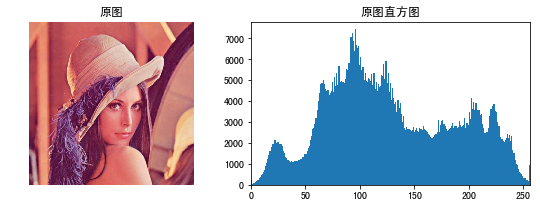

In [3]:
f = plt.figure(figsize=(10,3))
f.subplots_adjust(wspace=0)
s1 = f.add_subplot(121, title="原图")
s2 = f.add_subplot(122, title="原图直方图", xlim=[0,256])

s1.imshow(img);s1.axis('off');

s2.hist(img.ravel(), bins=255, range=[0,256])
plt.show()

### 高斯噪声

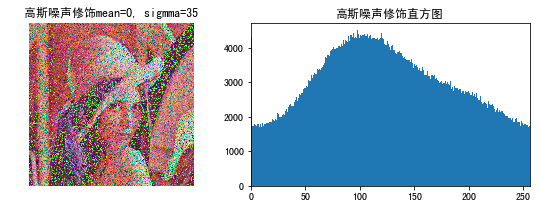

In [4]:
noise = np.random.normal(loc=0, scale=35, size=img.shape)
img_with_gaussian = (noise + img).astype('uint8')
f = plt.figure(figsize=(10,3))
f.subplots_adjust(wspace=0)
s1 = f.add_subplot(121, title="高斯噪声修饰mean=0, sigmma=35")
s2 = f.add_subplot(122, title="高斯噪声修饰直方图", xlim=[0,256])

s1.imshow(img_with_gaussian)
s1.axis('off');

s2.hist(img_with_gaussian.ravel(), bins=255, range=[0,256])
plt.show()

#### 信噪比SNR

$
SNR=\frac{\displaystyle \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}\hat{f}(x,y)^2}{\displaystyle \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}\left[f(x,y)-\hat{f}(x,y)\right]^2}
$

其中$\hat{f}(x,y)$是未污染图像$f$的一个估计, 在此处为噪声图像, $f$和$\hat{f}$越接近信噪比越大

In [5]:
snr = np.sum(img_with_gaussian**2)
snr /= np.sum((img-img_with_gaussian)**2)
print('高斯加噪图像的信噪比为 %6f' % snr)
# sigmma=35 snr=1.053611
# sigmma=10 snr=1.768579
# sigmma=5  snr=4.314756
# sigmma=1  snr=80.20923

高斯加噪图像的信噪比为 1.055438


### 椒盐噪声

In [6]:
def salt_noise(img, radio=0.5):
    image = img.copy()
    noiseNum = int(reduce(lambda x,y:x*y, image.shape) * radio)
    for i in range(noiseNum):
        randX = np.random.randint(0, image.shape[0])  
        randY = np.random.randint(0, image.shape[1])
        randZ = np.random.randint(0, image.shape[2])
        if np.random.randint(0, 2):  
            image[randX,randY, randZ] = 0  
        else:  
            image[randX,randY, randZ] = 255
    return image

In [7]:
img_with_salt_noise = salt_noise(img, radio=0.5)

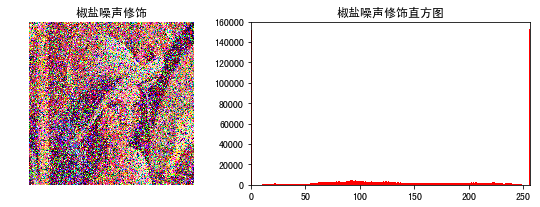

椒盐噪声修饰后信噪比: 1.543873


In [8]:
f = plt.figure(figsize=(10,3))
f.subplots_adjust(wspace=0)
s1 = f.add_subplot(121, title="椒盐噪声修饰")
s2 = f.add_subplot(122, title="椒盐噪声修饰直方图", xlim=[0,256])

s1.imshow(img_with_salt_noise)
s1.axis('off');

s2.hist(img_with_salt_noise.ravel(), bins=255, range=[0,256],facecolor='red')
plt.show()

snr = np.sum(img_with_salt_noise**2)
snr /= np.sum((img-img_with_salt_noise)**2)
print('椒盐噪声修饰后信噪比: %.6f'% snr)

## 图像去噪

In [9]:
# img_with_gaussian_dst = cv.blur(img_with_gaussian, (3,3))
# 或者自定义卷积核调用filter2D
averaging_kernel = np.ones((17,17), np.float32)/(17*17)
img_with_gaussian_averaging_blur = cv.filter2D(img_with_gaussian, -1, averaging_kernel)

### 平滑(均值)滤波

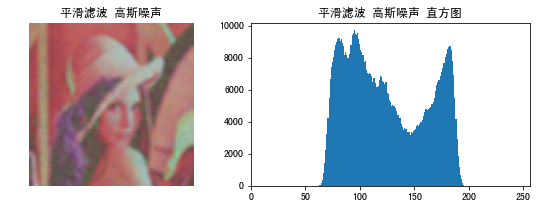

平滑滤波去高斯噪声 信噪比: 1.471049


In [10]:
f = plt.figure(figsize=(10,3))
f.subplots_adjust(wspace=0)
s1 = f.add_subplot(121, title="平滑滤波 高斯噪声")
s2 = f.add_subplot(122, title="平滑滤波 高斯噪声 直方图", xlim=[0,256])

s1.imshow(img_with_gaussian_averaging_blur)
s1.axis('off');

s2.hist(img_with_gaussian_averaging_blur.ravel(), bins=255, range=[0,256])
plt.show()

snr = np.sum(img_with_gaussian_averaging_blur**2)
snr /=np.sum((img-img_with_gaussian_averaging_blur)**2)
print('平滑滤波去高斯噪声 信噪比: %.6f'% snr)

### (加权)高斯滤波

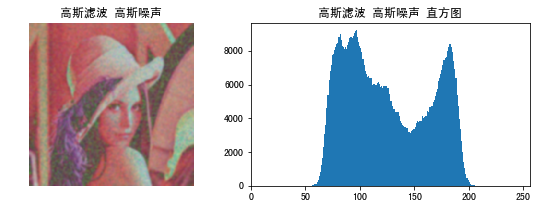

高斯滤波去高斯噪声信噪比: 1.575603


In [11]:
img_with_gaussian_gaussian_blur = cv.GaussianBlur(img_with_gaussian, (17, 17), 0, 0)

f = plt.figure(figsize=(10,3))
f.subplots_adjust(wspace=0)
s1 = f.add_subplot(121, title="高斯滤波 高斯噪声")
s2 = f.add_subplot(122, title="高斯滤波 高斯噪声 直方图", xlim=[0,256])

s1.imshow(img_with_gaussian_gaussian_blur)
s1.axis('off');

s2.hist(img_with_gaussian_gaussian_blur.ravel(), 
            bins=255, range=[0,256])
plt.show()

snr = np.sum(img_with_gaussian_gaussian_blur**2)
snr /=np.sum((img-img_with_gaussian_gaussian_blur)**2)
print('高斯滤波去高斯噪声信噪比: %.6f'% snr)

### 中值滤波

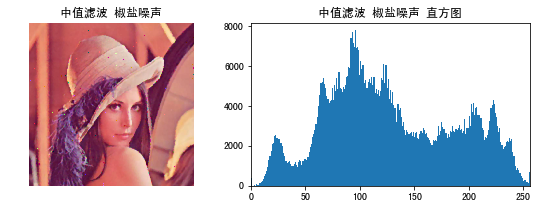

中值滤波 椒盐噪声修饰后信噪比: 4.334472


In [12]:
img_with_salt_noise_median = cv.medianBlur(img_with_salt_noise, 5)

f = plt.figure(figsize=(10,3))
f.subplots_adjust(wspace=0)
s1 = f.add_subplot(121, title="中值滤波 椒盐噪声")
s2 = f.add_subplot(122, title="中值滤波 椒盐噪声 直方图", xlim=[0,256])

s1.imshow(img_with_salt_noise_median)
s1.axis('off');

s2.hist(img_with_salt_noise_median.ravel(), bins=255, 
            range=[0,256])
plt.show()

snr = np.sum(img_with_salt_noise_median**2)
snr /=np.sum((img-img_with_salt_noise_median)**2)
print('中值滤波 椒盐噪声修饰后信噪比: %.6f'% snr)

## 图像梯度

### 一阶微分——梯度

$\triangledown f\equiv\mathrm{grad}(f)\equiv\begin{bmatrix} g_x\\  g_y \end{bmatrix}$   
$M(x,y)\approx|(z_7+2z_8+z_9)-(z_1+2_2+z3)|+|(z_3+2_6+z_9)-(z_1+2z_4+z_7)|$  

#### $\mathrm{Soble}$ 算子

x方向soble算子:
 [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
y方向soble算子:
 [[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


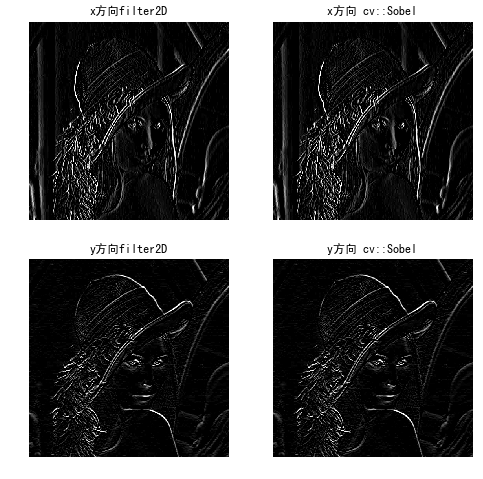

In [13]:
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]]) # 已旋转

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

sobel_x = cv.getDerivKernels(1, 0, 3)
sobel_y = cv.getDerivKernels(0, 1, 3)

sobel_x_DIY = signal.convolve2d(sobel_x[0], sobel_x[1].T).T
sobel_y_DIY = signal.convolve2d(sobel_y[0], sobel_y[1].T).T

print('x方向soble算子:\n', sobel_x_DIY)
print('y方向soble算子:\n', sobel_y_DIY)

img_soble = cv.Sobel(img_gray, -1, 1, 1, ksize=3) # 先在x方向求再在y方向求
img_soble_x = cv.Sobel(img_gray, -1, 1, 0, ksize=3) # 只在x方向
img_soble_y = cv.Sobel(img_gray, -1, 0, 1, ksize=3) # 只在y方向

f = plt.figure(figsize=(8,8))
plt.subplot(221);plt.axis('off');plt.title('x方向filter2D');
plt.imshow(cv.filter2D(img_gray, -1, sobel_x_DIY), cmap='gray')


plt.subplot(222);plt.axis('off');plt.title('x方向 cv::Sobel');
plt.imshow(img_soble_x, cmap='gray')

plt.subplot(223);plt.axis('off');plt.title('y方向filter2D');
plt.imshow(cv.filter2D(img_gray, -1, sobel_y_DIY), cmap='gray')

plt.subplot(224);plt.axis('off');plt.title('y方向 cv::Sobel');
plt.imshow(img_soble_y, cmap='gray')

plt.show()

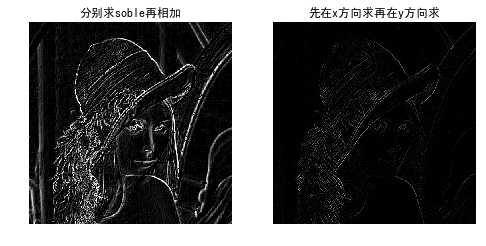

In [14]:
plt.figure(figsize=(8,8))
plt.subplot(121);
plt.title('分别求soble再相加');plt.axis('off')
plt.imshow(img_soble_x+img_soble_y, cmap='gray')
plt.subplot(122)
plt.title('先在x方向求再在y方向求');plt.axis('off')
plt.imshow(img_soble, cmap='gray')
plt.show()

#### Prewitt 算子

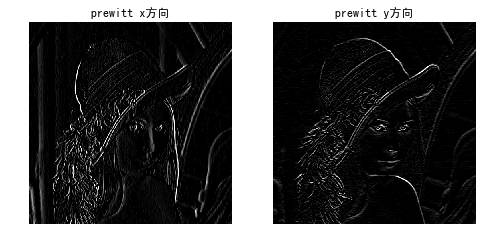

In [15]:
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])
img_prewitt_x = cv.filter2D(img_gray, -1, prewitt_x)
img_prewitt_y = cv.filter2D(img_gray, -1, prewitt_y)
plt.figure(figsize=(8,8))

plt.subplot(121)
plt.title('prewitt x方向');plt.axis('off')
plt.imshow(img_prewitt_x, cmap='gray')
plt.subplot(122)
plt.title('prewitt y方向');plt.axis('off')
plt.imshow(img_prewitt_y, cmap='gray')
plt.show()

#### Laplacian 算子

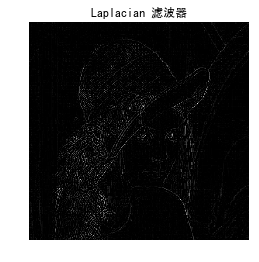

In [16]:
img_gray_laplacian = cv.Laplacian(img_gray, -1, (3,3))
plt.title('Laplacian 滤波器');plt.axis('off')
plt.imshow(img_gray_laplacian, cmap='gray')
plt.show()

## 线性锐化

### 二阶微分——拉普拉斯算子

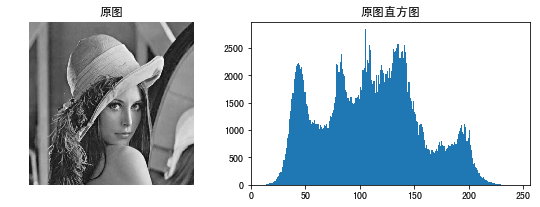

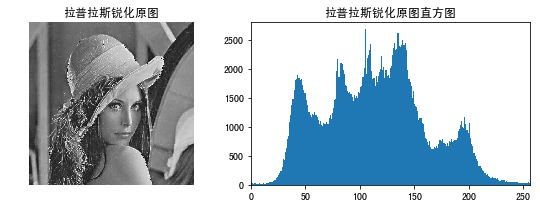

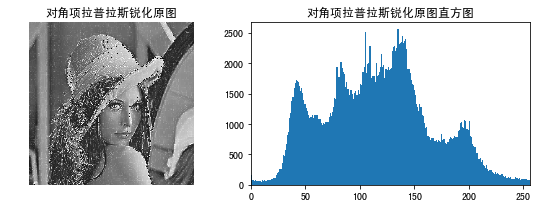

拉普拉斯锐化原图后信噪比: 5.481581
带有对角项拉普拉斯锐化原图信噪比: 3.168285


In [17]:
img = img_gray
laplace_kernel = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0],
])

laplace_kernel_diag = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1],
])

img_laplace = img+cv.filter2D(
            img, -1, -laplace_kernel).astype('uint8')

img_laplace_diag = img+cv.filter2D(
            img, -1, -laplace_kernel_diag).astype('uint8')

f0 = plt.figure(figsize=(10,3))
f1 = plt.figure(figsize=(10,3))
f2 = plt.figure(figsize=(10,3))
f0.subplots_adjust(wspace=0)
f1.subplots_adjust(wspace=0)
f2.subplots_adjust(wspace=0)

s0 = f0.add_subplot(1,2,1, title='原图')
s1 = f0.add_subplot(1,2,2, title="原图直方图",xlim=[0,256])
s2 = f1.add_subplot(1,2,1, title="拉普拉斯锐化原图")
s3 = f1.add_subplot(1,2,2, title="拉普拉斯锐化原图直方图", xlim=[0,256])
s4 = f2.add_subplot(1,2,1, title='对角项拉普拉斯锐化原图')
s5 = f2.add_subplot(1,2,2, title="对角项拉普拉斯锐化原图直方图",xlim=[0,256])

s0.imshow(img, cmap='gray')
s0.axis('off')
s1.hist(img.ravel(), bins=255, range=[0,256])

s2.imshow(img_laplace, cmap='gray')
s2.axis('off');
s3.hist(img_laplace.ravel(), bins=255, range=[0,256])

s4.imshow(img_laplace_diag,cmap='gray')
s4.axis('off');
s5.hist(img_laplace_diag.ravel(), bins=255, range=[0,256])
plt.show()

snr = np.sum(img_laplace**2)/np.sum((img-img_laplace)**2)
print('拉普拉斯锐化原图后信噪比: %.6f'% snr)
snr = np.sum(img_laplace_diag**2)
snr /=np.sum((img-img_laplace_diag)**2)
print('带有对角项拉普拉斯锐化原图信噪比: %.6f'% snr)

### 非锐化掩蔽和高提升滤波

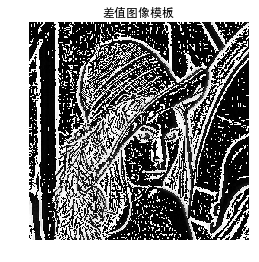

In [18]:
img_gray_with_gaussian_blur = cv.GaussianBlur(
                                img_gray, (21,21), 0)
template = img_gray - img_gray_with_gaussian_blur
plt.imshow(template, cmap='gray')
plt.title('差值图像模板');plt.axis('off');plt.show()

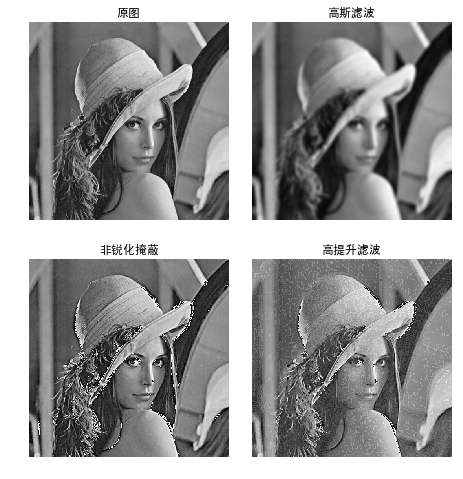

In [19]:
f = plt.figure(figsize=(8, 8))
f.subplots_adjust(wspace=0)

s1 = f.add_subplot(221 ,title="原图")
s2 = f.add_subplot(222 ,title="高斯滤波")
s3 = f.add_subplot(223, title="非锐化掩蔽")
s4 = f.add_subplot(224, title='高提升滤波')

unsharp_masking_img = (img_gray + 1*template).astype('uint8')

s1.imshow(img_gray, cmap='gray');s1.axis('off')
s2.imshow(img_gray_with_gaussian_blur, cmap='gray');s2.axis('off')
s3.imshow(unsharp_masking_img, cmap='gray');s3.axis('off')
unsharp_masking_img = (img_gray + 1.15*template).astype('uint8')
s4.imshow(unsharp_masking_img, cmap='gray');s4.axis('off')
plt.show()